In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
poum nc
ennis us
smithfield us
tasiilaq gl
port elizabeth za
cape town za
anadyr ru
fortuna us
mataura pf
nanakuli us
guiyang cn
kapaa us
hobart au
hermanus za
svetlaya ru
cape town za
barrow us
saskylakh ru
mataura pf
clyde river ca
lagoa pt
cherskiy ru
kapaa us
avera pf
barentsburg sj
nizhnyaya tura ru
tuatapere nz
busselton au
butaritari ki
airai pw
ushuaia ar
lata sb
punta arenas cl
punta arenas cl
ushuaia ar
finschhafen pg
ushuaia ar
punta arenas cl
illoqqortoormiut gl
katsuura jp
bethel us
saleaula ws
esperance au
umzimvubu za
ganeasa ro
hilo us
poum nc
atuona pf
punta arenas cl
kapaa us
svetlogorsk ru
lahij ye
mys shmidta ru
srednekolymsk ru
hambantota lk
kapaa us
lebu cl
karratha au
nikolskoye ru
leh in
byron bay au
mount isa au
cockburn harbour tc
castro cl
pacific grove us
ushuaia ar
mys shmidta ru
illoqqortoormiut gl
ushuaia ar
port alfred za
arraial do cabo br
lorengau pg
barrow us
bambous virieux mu
butaritari ki
marsa matruh eg
port elizabeth za
ngukurr au
pu

atuona pf
qandahar af
san isidro ph
hithadhoo mv
ossora ru
port elizabeth za
dikson ru
barrow us
tena ec
hermanus za
taolanaro mg
chokurdakh ru
luganville vu
albany au
cabo san lucas mx
chara ru
nikolskoye ru
demba cd
kralendijk an
paragominas br
atuona pf
hobart au
parfino ru
ust-maya ru
rikitea pf
olga ru
saint george bm
sinnamary gf
kabinda cd
san pedro bz
ilulissat gl
hermanus za
albany au
sambava mg
tarko-sale ru
ushuaia ar
san patricio mx
barrow us
zachagansk kz
dubbo au
illoqqortoormiut gl
atuona pf
dikson ru
tuktoyaktuk ca
faanui pf
cherskiy ru
punta arenas cl
sobolevo ru
mys shmidta ru
tasiilaq gl
cervo es
tuktoyaktuk ca
butaritari ki
hithadhoo mv
wiwili ni
ushuaia ar
qasigiannguit gl
busselton au
dikson ru
vardo no
bredasdorp za
ust-maya ru
katsuura jp
busselton au
touros br
hermanus za
hilo us
caraquet ca
iqaluit ca
ondjiva ao
rikitea pf
thaton mm
sistranda no
nizhneyansk ru
lolua tv
wanxian cn
albany au
hilo us
pedernales do
tuktoyaktuk ca
skagen dk
punta arenas cl
lagoa pt

puerto carreno co
kodiak us
bengkulu id
saint-philippe re
klaksvik fo
barentsburg sj
galiwinku au
berlevag no
nanortalik gl
talnakh ru
albany au
margate za
bredasdorp za
amderma ru
ushuaia ar
yulara au
bengkulu id
nemuro jp
bajo baudo co
college us
punta arenas cl
hamilton bm
tasiilaq gl
anjozorobe mg
victoria sc
vitim ru
cape town za
cidreira br
ushuaia ar
winsum nl
saskylakh ru
kapaa us
new norfolk au
butaritari ki
vaitupu wf
coquimbo cl
ushuaia ar
ponta do sol cv
rikitea pf
wulanhaote cn
mataura pf
belushya guba ru
antalaha mg
qasigiannguit gl
rikitea pf
cururupu br


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b8ee007073380abd43fb4965a6f379d


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | poum
Processing Record 3 of Set 1 | ennis
Processing Record 4 of Set 1 | smithfield
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | nanakuli
Processing Record 12 of Set 1 | guiyang
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | svetlaya
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | avera
Processing Record 23 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 24 of Set 1 | nizhnyaya tura

Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | tainan
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | todos santos
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | batagay
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | kaoma
Processing Record 49 of Set 4 | yerofey pavlovich
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | bargal
City not found. Skipping...
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | jamestown
Processing Record 4 of Set 5 | champerico
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | ndola
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | saint-philippe
Processing Record 9 of Set 5 | igdir
Processing Record 10 of Set 5 | kiama
Processing Record 11 of Set 5 | skagastrond
City not found. Skipping...
P

Processing Record 29 of Set 8 | sobolevo
Processing Record 30 of Set 8 | cervo
Processing Record 31 of Set 8 | wiwili
Processing Record 32 of Set 8 | qasigiannguit
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | caraquet
Processing Record 35 of Set 8 | ondjiva
Processing Record 36 of Set 8 | thaton
Processing Record 37 of Set 8 | sistranda
Processing Record 38 of Set 8 | lolua
City not found. Skipping...
Processing Record 39 of Set 8 | wanxian
Processing Record 40 of Set 8 | pedernales
Processing Record 41 of Set 8 | skagen
Processing Record 42 of Set 8 | zhigalovo
Processing Record 43 of Set 8 | bac lieu
Processing Record 44 of Set 8 | portmore
Processing Record 45 of Set 8 | doha
Processing Record 46 of Set 8 | hanzhong
Processing Record 47 of Set 8 | bathsheba
Processing Record 48 of Set 8 | the pas
Processing Record 49 of Set 8 | gouyave
Processing Record 50 of Set 8 | angoche
Processing Record 1 of Set 9 | cabatuan
Processing Record 2 of Set 9 | jumla
Process

Processing Record 18 of Set 12 | achern
Processing Record 19 of Set 12 | sorokino
Processing Record 20 of Set 12 | warmbad
Processing Record 21 of Set 12 | marcona
City not found. Skipping...
Processing Record 22 of Set 12 | aranda de duero
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | la macarena
Processing Record 25 of Set 12 | rantauprapat
Processing Record 26 of Set 12 | hunza
City not found. Skipping...
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | rivne
Processing Record 29 of Set 12 | lakewood
Processing Record 30 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 12 | sabang
Processing Record 32 of Set 12 | fountain hills
Processing Record 33 of Set 12 | puerto baquerizo moreno
Processing Record 34 of Set 12 | roma
Processing Record 35 of Set 12 | cheremisinovo
Processing Record 36 of Set 12 | lang son
Processing Record 37 of Set 12 | raudeberg
Processing Record 38 of Set 12 | medina
Processing Rec

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,58,71,8.37,AU,2020-04-17 19:05:32
1,Poum,-20.23,164.02,78.33,75,72,10.49,NC,2020-04-17 19:05:32
2,Ennis,52.84,-8.99,53.60,81,75,10.29,IE,2020-04-17 19:05:32
3,Smithfield,41.92,-71.55,52.00,31,75,12.75,US,2020-04-17 19:05:32
4,Tasiilaq,65.61,-37.64,34.93,93,100,21.36,GL,2020-04-17 18:58:33
5,Port Elizabeth,-33.92,25.57,62.60,93,41,6.93,ZA,2020-04-17 19:02:15
6,Cape Town,-33.93,18.42,62.01,72,42,9.17,ZA,2020-04-17 19:05:33
7,Anadyr,64.75,177.48,5.00,84,75,11.18,RU,2020-04-17 19:05:33
8,Fortuna,40.60,-124.16,53.01,100,90,10.29,US,2020-04-17 19:04:46
9,Mataura,-46.19,168.86,50.00,92,100,5.99,NZ,2020-04-17 19:05:33


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-04-17 19:05:32,-33.65,115.33,55.99,58,71,8.37
1,Poum,NC,2020-04-17 19:05:32,-20.23,164.02,78.33,75,72,10.49
2,Ennis,IE,2020-04-17 19:05:32,52.84,-8.99,53.60,81,75,10.29
3,Smithfield,US,2020-04-17 19:05:32,41.92,-71.55,52.00,31,75,12.75
4,Tasiilaq,GL,2020-04-17 18:58:33,65.61,-37.64,34.93,93,100,21.36


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/17/20'

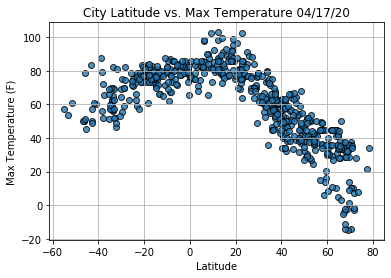

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

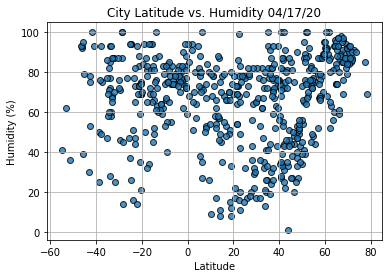

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

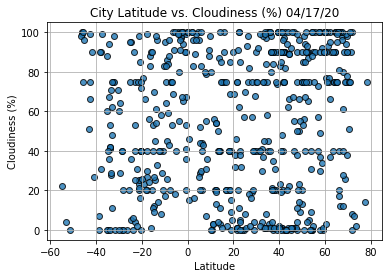

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

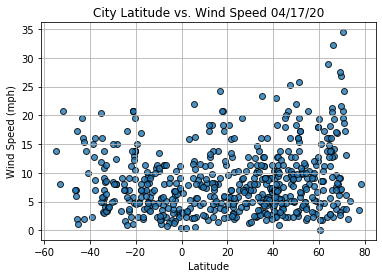

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-24-f235f13efcbc>, line 6)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))